In [5]:
import csv
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source="auto", target="ar")


def translate_text(text, target_language="ar"):
    """Translates text into the target language using googletrans."""
    translation = translator.translate(text)
    return translation


def translate_captions(input_file, output_file):
    """Reads the input text file, translates the captions, and writes to the output text file."""
    with open(input_file, "r", encoding="utf-8") as infile, open(
        output_file, "w", newline="", encoding="utf-8"
    ) as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Write the header
        writer.writerow(next(reader))
        i = -1
        # Translate each caption and write to the output file
        for row in reader:
            image_name = row[0]
            i += 1
            if i > -1:
                caption = row[1]
                translated_caption = translate_text(caption)
                writer.writerow([image_name, translated_caption])

# Path to your input and output files
input_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\test\test-captions.txt"
output_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\test\test-captions_arabic.txt"

# Translate the captions and save to a new file
translate_captions(input_file, output_file)

In [1]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source="auto", target="ar")
translation = translator.translate("hello dear")
print(translation)

مرحباً عزيزي


# For Arwa

add 91: to 125: on top of the file.

In [3]:
def prepend_lines_to_file(file_path):
    # Generate the lines to be added
    new_lines = []
    for i in range(91, 126):
        new_lines.extend([f"{i}: \n"] * 5)
        new_lines.extend([f"\n"])
    # Read the existing content of the file
    with open(file_path, "r") as file:
        existing_content = file.readlines()

    # Combine the new lines with the existing content
    updated_content = new_lines + existing_content

    # Write the updated content back to the file
    with open(file_path, "w") as file:
        file.writelines(updated_content)


# Use the function
file_path = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Arwa\captions-en.txt"  # Replace with the path to your text file
prepend_lines_to_file(file_path)

# For YM

arwa images captions..

In [6]:
import re
from docx import Document


# Function to extract and process the text
def process_docx(input_file, output_file):
    doc = Document(input_file)
    lines = [p.text for p in doc.paragraphs]

    output_lines = []
    current_image = None

    for line in lines:
        line = line.strip()
        if line.isdigit():  # Detecting image number
            current_image = f"Arwa_to_YM_{line}.jpg"
        else:
            # Extracting English text using regex (assumes English text comes before Arabic text)
            english_text = re.split(r"[^\x00-\x7F]+", line)[0].strip()
            if english_text:
                output_lines.append(f"{current_image},{english_text}.\n")

    with open(output_file, "w", encoding="utf-8") as file:
        file.writelines(output_lines)


# Input and output file paths
input_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\arwa.docx"
output_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\All_captions.txt"

# Run the function
process_docx(input_file, output_file)

rename arwa_to_YM images

In [ ]:
import os


# Function to rename image files
def rename_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jfif") and filename.split(".")[0].isdigit():
            number = filename.split(".")[0]
            new_filename = f"Esraa_{number}.jfif"
            os.rename(
                os.path.join(folder_path, filename),
                os.path.join(folder_path, new_filename),
            )
            print(f"Renamed {filename} to {new_filename}")


# Folder path containing the .jpg files
folder_path = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Esraa\proj img"

# Run the function
rename_images(folder_path)

add mo3_To_YM captions 

In [8]:
from docx import Document


# Function to extract and process the text from the additional captions file
def process_additional_docx(additional_file):
    doc = Document(additional_file)
    lines = [p.text for p in doc.paragraphs]

    output_lines = []

    for line in lines:
        if ":" in line:
            image_name, caption = line.split(":", 1)
            image_name = image_name.strip() + ".png"
            caption = caption.strip()
            output_lines.append(f"{image_name},{caption}\n")

    return output_lines


# Input and output file paths
additional_file = (
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions-en.docx"
)
output_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\All_captions.txt"

# Process the additional captions file
additional_output_lines = process_docx_mo(additional_file)

# Read existing output.txt content
with open(output_file, "r", encoding="utf-8") as file:
    existing_lines = file.readlines()

# Append additional captions to existing lines
all_output_lines = existing_lines + additional_output_lines

# Write the combined content back to output.txt
with open(output_file, "w", encoding="utf-8") as file:
    file.writelines(all_output_lines)

print(f"Appended captions from {additional_file} to {output_file}.")

Appended captions from D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions-en.docx to D:\MO3 LAP\Datasets\Manually captioned data for gp\All_captions.txt.


merged code and checker

In [14]:
from docx import Document
import os


def replace_v_with_V_in_docx(input_path, output_path):
    doc = Document(input_path)

    for para in doc.paragraphs:
        if "v" in para.text:
            para.text = para.text.replace("v", "V")

    doc.save(output_path)


def rename_images_in_directory(directory):
    for filename in os.listdir(directory):
        if "v" in filename:
            new_filename = filename.replace("v", "V")
            os.rename(
                os.path.join(directory, filename), os.path.join(directory, new_filename)
            )


# Example usage
replace_v_with_V_in_docx(
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions-en.docx",
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions-en.docx",
)
rename_images_in_directory(
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\images"
)

# All in 1

In [2]:
import os
import re
from docx import Document
from collections import defaultdict


def process_docx_es(input_file):
    doc = Document(input_file)
    lines = [p.text for p in doc.paragraphs]

    captions_dict = defaultdict(list)
    current_image = None

    for line in lines:
        line = line.strip()
        # if line == "1" or line == 1:
        # print("line: ", line)
        if line.isdigit():
            current_image = f"Esraa_to_YM_{line}.jpg"
        else:
            # Extracting English text using regex (assumes English text comes before Arabic text)
            english_text = re.split(r"[^\x00-\x7F]+", line)[0].strip()
            if english_text and current_image:

                if english_text[-1] == ".":
                    captions_dict[current_image].append(f"{english_text}")
                else:
                    captions_dict[current_image].append(f"{english_text}.")
    return captions_dict


def process_docx_ar(input_file):
    doc = Document(input_file)
    lines = [p.text for p in doc.paragraphs]

    captions_dict = defaultdict(list)
    current_image = None

    for line in lines:
        line = line.strip()
        # if line == "1" or line == 1:
        # print("line: ", line)
        if line.isdigit():
            current_image = f"Arwa_to_YM_{line}.jpg"
        else:
            # Extracting English text using regex (assumes English text comes before Arabic text)
            english_text = re.split(r"[^\x00-\x7F]+", line)[0].strip()
            if english_text and current_image:
                if english_text[-1] == ".":
                    captions_dict[current_image].append(f"{english_text}")
                else:
                    captions_dict[current_image].append(f"{english_text}.")

    return captions_dict


def process_docx_mo(additional_file):
    doc = Document(additional_file)
    lines = [p.text for p in doc.paragraphs]

    captions_dict = defaultdict(list)

    for line in lines:
        if ":" in line:
            image_name, caption = line.split(":", 1)
            image_name = image_name.strip() + ".png"
            caption = caption.strip()
            if caption[-1] == ".":
                captions_dict[image_name].append(f"{caption}")
            else:
                captions_dict[image_name].append(f"{caption}.")
    return captions_dict


def process_Arwa(additional_file):
    with open(additional_file, "r") as file:
        lines = file.readlines()

    captions_dict = defaultdict(list)

    for line in lines:
        if ":" in line:
            image_name, caption = line.split(":", 1)
            image_name = f"Arwa_{image_name.strip()}" + ".jpg"
            caption = caption.strip()
            if caption and caption[-1] != ".":
                caption += "."
            captions_dict[image_name].append(caption)

    return captions_dict


def process_Esraa(input_file):
    doc = Document(input_file)
    lines = [p.text for p in doc.paragraphs]

    captions_dict = defaultdict(list)
    current_image = None

    for line in lines:
        line = line.strip()
        # if line == "1" or line == 1:
        # print("line: ", line)
        if line.isdigit():
            current_image = f"Esraa_{line}.jfif"
        else:
            # Extracting English text using regex (assumes English text comes before Arabic text)
            english_text = re.split(r"[^\x00-\x7F]+", line)[0].strip()
            if english_text and current_image:

                if english_text[-1] == ".":
                    captions_dict[current_image].append(f"{english_text}")
                else:
                    captions_dict[current_image].append(f"{english_text}.")
    return captions_dict


def ensure_five_captions(captions_dict, image_list):
    for image_name in image_list:
        if image_name in captions_dict:
            captions = captions_dict[image_name]
            if len(captions) != 5:
                print(f"Warning: {image_name} has {len(captions)} captions.")
            captions_dict[image_name] = captions[:5]  # Keep only the first 5 captions
        else:
            print(f"Warning: {image_name} is missing captions.")

    return captions_dict


# get image names from folders
def get_image_names(folder):
    return [f for f in os.listdir(folder) if f.endswith(".jpg") or f.endswith(".png")]


Esraa_to_YM_file = (
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions222.docx"
)
Arwa_to_YM_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\arwa.docx"
Mo3_to_YM_file = (
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\captions-en.docx"
)
Arwa_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Arwa\all_captions.txt"
Esraa_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Esraa\Esraa Caps.docx"

output_file = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\All_captions.txt"

image_folder_1 = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\yara_mariam"
image_folder_2 = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\images"
image_folder_3 = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\YM\esraa images"
image_folder_4 = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Arwa\all_images"
image_folder_5 = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\Esraa\proj img"


image_names_1 = get_image_names(image_folder_1)
image_names_2 = get_image_names(image_folder_2)
image_names_3 = get_image_names(image_folder_3)
image_names_4 = get_image_names(image_folder_4)
image_names_5 = get_image_names(image_folder_5)


all_image_names = (
    image_names_1 + image_names_2 + image_names_3 + image_names_4 + image_names_5
)

arwa_to_YM_captions_dict = process_docx_ar(Arwa_to_YM_file)
esraa_to_YM_captions_dict = process_docx_es(Esraa_to_YM_file)
mo3_to_YM_captions_dict = process_docx_mo(Mo3_to_YM_file)
arwa_captions_dict = process_Arwa(Arwa_file)
esraa_captions_dict = process_Esraa(Esraa_file)


# Combine the dictionaries
combined_captions_dict = defaultdict(list)
for key, value in arwa_to_YM_captions_dict.items():
    combined_captions_dict[key].extend(value)
for key, value in esraa_to_YM_captions_dict.items():
    combined_captions_dict[key].extend(value)
for key, value in mo3_to_YM_captions_dict.items():
    combined_captions_dict[key].extend(value)
for key, value in arwa_captions_dict.items():
    combined_captions_dict[key].extend(value)
for key, value in esraa_captions_dict.items():
    combined_captions_dict[key].extend(value)

combined_captions_dict = ensure_five_captions(combined_captions_dict, all_image_names)

# Read existing output.txt content if exists
if os.path.exists(output_file):
    with open(output_file, "r", encoding="utf-8") as file:
        existing_lines = file.readlines()
else:
    existing_lines = []

# Combine existing lines with new captions
existing_captions_dict = defaultdict(list)
for line in existing_lines:
    image_name, caption = line.split(",", 1)
    existing_captions_dict[image_name].append(caption.strip())

for key, value in combined_captions_dict.items():
    existing_captions_dict[key].extend(value)
    existing_captions_dict[key] = existing_captions_dict[key][:5]

# Write the combined content back to output.txt
with open(output_file, "w", encoding="utf-8") as file:
    for image_name, captions in existing_captions_dict.items():
        for caption in captions:
            file.write(f"{image_name},{caption}\n")

My captions

In [4]:
import pandas as pd


def extract_and_save_captions(excel_file, output_file):
    # Load the Excel file
    df = pd.read_excel(excel_file, header=None)

    # Initialize a list to store the results
    results = []

    current_image = None
    english_count = 0
    arabic_count = 0

    # Iterate through the rows of the DataFrame
    for index, row in df.iterrows():
        if pd.notna(row[0]) and row[0].startswith("image_"):
            # If the cell in the first column contains an image identifier, update current_image
            current_image = row[0] + ".jpg"
            english_count = 0
            arabic_count = 0
        elif pd.notna(row[0]):
            # If the cell in the first column is not empty and not an image identifier, process captions
            caption = row[0]
            if current_image and english_count < 5:
                results.append(f"{current_image},{caption}")
                english_count += 1
            else:
                arabic_count += 1
                if arabic_count >= 5:
                    english_count = 0
                    arabic_count = 0

    # Save the results to the output file
    with open(output_file, "w") as file:
        for result in results:
            file.write(result + "\n")


# Use the function
excel_file_path = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\ALMoatasim\mo3_captions (3) (3).xlsx"  # Replace with the actual path to your Excel file
output_file_path = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\ALMoatasim\mo3_captions.txt"  # Replace with the desired output file path
extract_and_save_captions(excel_file_path, output_file_path)

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.layers import TextVectorization
import nltk
from nltk.translate.bleu_score import sentence_bleu

seed = 111
np.random.seed(seed)
tf.random.set_seed(seed)

In [23]:
def reverse_words(input_string):
    # Split the string into a list of words
    words = input_string.split()
    # Reverse the list of words
    reversed_words = words[::-1]
    # Join the reversed list back into a single string
    reversed_string = " ".join(reversed_words)
    return reversed_string


# Example usage
original_string = "أنا احمد نادر"
reversed_string = reverse_words(original_string)
print(reversed_string)  # Output: نادر احمد أنا

نادر احمد أنا


In [95]:
IMAGES_PATH = r"D:\MO3 LAP\Datasets\Manually captioned data for gp\All_images"
IMAGE_SIZE = (299, 299)


VOCAB_SIZE = 10000


SEQ_LENGTH = 27  # max seqence length


EMBED_DIM = 512


FF_DIM = 512


BATCH_SIZE = 64


EPOCHS = 20


AUTOTUNE = tf.data.AUTOTUNE

In [106]:
def load_captions_data(filename):
    with open(filename) as caption_file:
        caption_data = caption_file.readlines()
        caption_mapping = {}
        text_data = []
        images_to_skip = set()

        for line in caption_data:
            line = line.rstrip("\n")
            img_name, caption = line.split(",", 1)  # Split only at the first comma
            if img_name.startswith("Esraa_") and not img_name.startswith("Esraa_to"):
                img_name = img_name.replace("jpg", "jfif")
            if img_name.startswith("image_"):
                img_name = img_name.replace("jpg", "png")

            img_name = img_name.split("#")[0]

            img_name = os.path.join(IMAGES_PATH, img_name.strip())

            tokens = caption.strip().split()
            # print(caption)
            if len(tokens) < 0 or len(tokens) > SEQ_LENGTH:
                images_to_skip.add(img_name)
                continue
            caption = caption.replace(".", "")
            caption = reverse_words(caption)
            if (
                img_name.endswith("jpg")
                or img_name.endswith("jfif")
                or img_name.endswith("png")
            ) and img_name not in images_to_skip:

                caption = "<start> " + caption.strip() + " <end>"
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name].append(caption)
                else:
                    caption_mapping[img_name] = [caption]

        for img_name in images_to_skip:
            if img_name in caption_mapping:
                del caption_mapping[img_name]

        return caption_mapping, text_data


def train_val_split(caption_data, train_size=0.8, shuffle=True):
    all_images = list(caption_data.keys())

    if shuffle:
        np.random.shuffle(all_images)

    train_size = int(len(caption_data) * train_size)

    training_data = {
        img_name: caption_data[img_name] for img_name in all_images[:train_size]
    }
    validation_data = {
        img_name: caption_data[img_name] for img_name in all_images[train_size:]
    }

    return training_data, validation_data


captions_mapping, text_data = load_captions_data(
    r"D:\MO3 LAP\Datasets\Manually captioned data for gp/All_captions_arabic.txt"
)
train_data, valid_data = train_val_split(captions_mapping)
print("Number of training samples: ", len(train_data))
print("Number of validation samples: ", len(valid_data))

Number of training samples:  800
Number of validation samples:  201


In [ ]:
text_data

In [108]:
def custom_standardization(input_text):
    # Normalize Arabic characters, remove unwanted characters
    input_text = tf.strings.regex_replace(
        input_text, "[^\u0621-\u064A\u0660-\u0669 ]", " "
    )
    input_text = tf.strings.regex_replace(
        input_text, "[%s]" % re.escape(strip_chars), " "
    )
    input_text = tf.strings.regex_replace(input_text, "\s+", " ")
    return input_text



strip_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"


strip_chars = strip_chars.replace("<", "")


strip_chars = strip_chars.replace(">", "")


vectorization = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",

    output_sequence_length=SEQ_LENGTH,
    standardize=custom_standardization,
)



vectorization.adapt(text_data)


image_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomContrast(0.3),
    ]
)

In [109]:
def decode_and_resize(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img


def process_input(img_path, captions):
    return decode_and_resize(img_path), vectorization(captions)


def make_dataset(images, captions):
    dataset = tf.data.Dataset.from_tensor_slices((images, captions))
    dataset = dataset.shuffle(BATCH_SIZE * 8)
    dataset = dataset.map(process_input, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return dataset


train_dataset = make_dataset(list(train_data.keys()), list(train_data.values()))

valid_dataset = make_dataset(list(valid_data.keys()), list(valid_data.values()))

In [ ]:
for image, caption in train_dataset.take(1):
    # print(f"Image: {image}")
    print(caption)
    break
# (64,5,25)
# captions shapes--> (batch_size, 5 =captions for each img, SEQ_LENGTH =max sequence length of each caption)

In [110]:
def get_cnn_model():
    base_model = EfficientNetV2B3(
        input_shape=(*IMAGE_SIZE, 3),
        include_top=False,
        weights="imagenet",
    )

    base_model.trainable = False
    base_model_out = base_model.output
    base_model_out = layers.Reshape((-1, base_model_out.shape[-1]))(base_model_out)
    cnn_model = keras.models.Model(base_model.input, base_model_out)
    return cnn_model


class TransformerEncoderBlock(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.0
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.dense_1 = layers.Dense(embed_dim, activation="relu")

    def call(self, inputs, training, mask=None):
        inputs = self.layernorm_1(inputs)
        inputs = self.dense_1(inputs)

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=None,
            training=training,
        )
        out_1 = self.layernorm_2(inputs + attention_output_1)
        return out_1


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.embed_scale = tf.math.sqrt(tf.cast(embed_dim, tf.float32))

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_tokens = embedded_tokens * self.embed_scale
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)


class TransformerDecoderBlock(layers.Layer):
    def __init__(self, embed_dim, ff_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.ff_dim = ff_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim, dropout=0.1
        )
        self.ffn_layer_1 = layers.Dense(ff_dim, activation="relu")
        self.ffn_layer_2 = layers.Dense(embed_dim)

        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()

        self.embedding = PositionalEmbedding(
            embed_dim=EMBED_DIM, sequence_length=SEQ_LENGTH, vocab_size=VOCAB_SIZE
        )
        self.out = layers.Dense(VOCAB_SIZE, activation="softmax")

        self.dropout_1 = layers.Dropout(0.3)
        self.dropout_2 = layers.Dropout(0.5)
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, training, mask=None):
        inputs = self.embedding(inputs)
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is not None:
            padding_mask = tf.cast(mask[:, :, tf.newaxis], dtype=tf.int32)
            combined_mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)
            combined_mask = tf.minimum(combined_mask, causal_mask)

        attention_output_1 = self.attention_1(  # self attention
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=combined_mask,
            training=training,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(  # cross attention mechanism
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
            training=training,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        ffn_out = self.ffn_layer_1(out_2)
        ffn_out = self.dropout_1(ffn_out, training=training)
        ffn_out = self.ffn_layer_2(ffn_out)

        ffn_out = self.layernorm_3(ffn_out + out_2, training=training)
        ffn_out = self.dropout_2(ffn_out, training=training)
        preds = self.out(ffn_out)
        return preds

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)


class ImageCaptioningModel(keras.Model):
    def __init__(
        self,
        cnn_model,
        encoder,
        decoder,
        num_captions_per_image=5,
        image_aug=None,
    ):
        super().__init__()
        self.cnn_model = cnn_model
        self.encoder = encoder
        self.decoder = decoder
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.acc_tracker = keras.metrics.Mean(name="accuracy")
        self.num_captions_per_image = num_captions_per_image
        self.image_aug = image_aug

    def calculate_loss(self, y_true, y_pred, mask):
        loss = self.loss(y_true, y_pred)
        mask = tf.cast(mask, dtype=loss.dtype)
        loss *= mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def calculate_accuracy(self, y_true, y_pred, mask):
        accuracy = tf.equal(y_true, tf.argmax(y_pred, axis=2))
        accuracy = tf.math.logical_and(mask, accuracy)
        accuracy = tf.cast(accuracy, dtype=tf.float32)
        mask = tf.cast(mask, dtype=tf.float32)
        return tf.reduce_sum(accuracy) / tf.reduce_sum(mask)

    def _compute_caption_loss_and_acc(self, img_embed, batch_seq, training=True):
        encoder_out = self.encoder(img_embed, training=training)
        batch_seq_inp = batch_seq[
            :, :-1
        ]  # take all but the last token , same as batch_seq[:,:,:-1]
        batch_seq_true = batch_seq[:, 1:]  # all but the first token
        mask = tf.math.not_equal(batch_seq_true, 0)
        batch_seq_pred = self.decoder(
            batch_seq_inp, encoder_out, training=training, mask=mask
        )
        loss = self.calculate_loss(batch_seq_true, batch_seq_pred, mask)
        acc = self.calculate_accuracy(batch_seq_true, batch_seq_pred, mask)
        return loss, acc

    def train_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0

        if self.image_aug:
            batch_img = self.image_aug(batch_img)

        img_embed = self.cnn_model(batch_img)

        for i in range(self.num_captions_per_image):
            with tf.GradientTape() as tape:
                loss, acc = self._compute_caption_loss_and_acc(
                    img_embed, batch_seq[:, i, :], training=True
                )

                batch_loss += loss
                batch_acc += acc

            train_vars = (
                self.encoder.trainable_variables + self.decoder.trainable_variables
            )

            grads = tape.gradient(loss, train_vars)

            self.optimizer.apply_gradients(zip(grads, train_vars))

        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)

        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}

    def test_step(self, batch_data):
        batch_img, batch_seq = batch_data
        batch_loss = 0
        batch_acc = 0
        img_embed = self.cnn_model(batch_img)
        for i in range(self.num_captions_per_image):
            loss, acc = self._compute_caption_loss_and_acc(
                img_embed, batch_seq[:, i, :], training=False
            )
            batch_loss += loss
            batch_acc += acc
        batch_acc /= float(self.num_captions_per_image)
        self.loss_tracker.update_state(batch_loss)
        self.acc_tracker.update_state(batch_acc)
        return {"loss": self.loss_tracker.result(), "acc": self.acc_tracker.result()}

    @property
    def metrics(self):
        return [self.loss_tracker, self.acc_tracker]


cnn_model = get_cnn_model()
encoder = TransformerEncoderBlock(embed_dim=EMBED_DIM, dense_dim=FF_DIM, num_heads=1)
decoder = TransformerDecoderBlock(embed_dim=EMBED_DIM, ff_dim=FF_DIM, num_heads=2)
caption_model = ImageCaptioningModel(
    cnn_model=cnn_model,
    encoder=encoder,
    decoder=decoder,
    image_aug=image_augmentation,
)

In [ ]:
cross_entropy = keras.losses.SparseCategoricalCrossentropy(
    from_logits=False, reduction="none"
)
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)


class LRSchedule(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, post_warmup_learning_rate, warmup_steps):
        super().__init__()
        self.post_warmup_learning_rate = post_warmup_learning_rate
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        global_step = tf.cast(step, tf.float32)
        warmup_steps = tf.cast(self.warmup_steps, tf.float32)
        warmup_progress = global_step / warmup_steps
        warmup_learning_rate = self.post_warmup_learning_rate * warmup_progress
        return tf.cond(
            global_step < warmup_steps,
            lambda: warmup_learning_rate,
            lambda: self.post_warmup_learning_rate,
        )


num_train_steps = len(train_dataset) * EPOCHS
num_warmup_steps = num_train_steps // 15
lr_schedule = LRSchedule(post_warmup_learning_rate=4e-4, warmup_steps=num_warmup_steps)
caption_model.compile(optimizer=keras.optimizers.Adam(lr_schedule), loss=cross_entropy)
caption_model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=valid_dataset,
    # callbacks=[early_stopping],
)

In [9]:
import json

# caption_model.save_weights('weights/8k_EfficientNetV2B3_weights')
# with open('weights/basic_vocab.json', 'w') as vocab_file:
# json.dump(index_lookup, vocab_file)

In [19]:
index_lookup[2]

'a'

In [7]:
caption_model.load_weights("weights/8k_EfficientNetV2B3_weights")

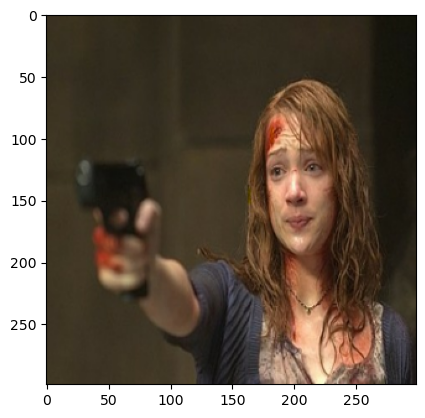

Predicted Caption:  امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة امرأة رجل رجل رجل رجل رجل يضرب رجل رجل رجل على رجل


In [114]:
vocab = vectorization.get_vocabulary()
index_lookup = dict(zip(range(len(vocab)), vocab))
max_decoded_sentence_length = SEQ_LENGTH - 1
valid_images = list(valid_data.keys())


def generate_caption():
    sample_img = (
        r"D:\MO3 LAP\Datasets\Manually captioned data for gp\for test\Esraa_171.jfif"
    )
    sample_img = decode_and_resize(sample_img)
    img = sample_img.numpy().clip(0, 255).astype(np.uint8)
    plt.imshow(img)
    plt.show()
    img = tf.expand_dims(sample_img, 0)
    img = caption_model.cnn_model(img)
    encoded_img = caption_model.encoder(img, training=False)
    decoded_caption = "<start> "
    for i in range(max_decoded_sentence_length):
        tokenized_caption = vectorization([decoded_caption])[:, :-1]
        mask = tf.math.not_equal(tokenized_caption, 0)
        predictions = caption_model.decoder(
            tokenized_caption, encoded_img, training=False, mask=mask
        )
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = index_lookup[sampled_token_index]
        if sampled_token == "<end>":
            break
        decoded_caption += " " + sampled_token

    decoded_caption = decoded_caption.replace("<start> ", "")
    decoded_caption = decoded_caption.replace(" <end>", "").strip()
    print("Predicted Caption: ", decoded_caption)


generate_caption()

In [97]:
# Function to calculate BLEU scores for a list of reference and candidate sentences
def calculate_bleu_scores(references, candidates):
    bleu_scores = []
    for ref, cand in zip(references, candidates):
        # Convert the reference sentences to lists of words
        references = [ref.split() for ref in ref]
        candidate = cand.split()  # Convert the candidate sentence to a list of words
        # Calculate BLEU score
        bleu = nltk.translate.bleu_score.sentence_bleu(references, candidate)
        bleu_scores.append(bleu)
    return bleu_scores

In [9]:
# Generate captions for a set of images
def generate_captions_for_images(image_paths):
    captions = []
    for image_path in image_paths:
        img = decode_and_resize(image_path)
        img = tf.expand_dims(img, 0)
        img = caption_model.cnn_model(img)
        encoded_img = caption_model.encoder(img, training=False)
        decoded_caption = "<start> "
        for i in range(max_decoded_sentence_length):
            tokenized_caption = vectorization([decoded_caption])[:, :-1]
            mask = tf.math.not_equal(tokenized_caption, 0)
            predictions = caption_model.decoder(
                tokenized_caption, encoded_img, training=False, mask=mask
            )
            sampled_token_index = np.argmax(predictions[0, i, :])
            sampled_token = index_lookup[sampled_token_index]
            if sampled_token == "<end>":
                break
            decoded_caption += " " + sampled_token
        decoded_caption = decoded_caption.replace("<start> ", "")
        decoded_caption = decoded_caption.replace(" <end>", "").strip()
        captions.append(decoded_caption)
    return captions

In [99]:
# Define a list of test image paths
test_image_paths = [
    "test image/101669240_b2d3e7f17b.jpg",
    "test image/1002674143_1b742ab4b8.jpg",
    "test image/1001773457_577c3a7d70.jpg",
]
# # Load the test image paths from the file
# with open(test_image_paths) as test_images_file:
#     test_image_paths = [line.strip() for line in test_images_file]
# # Print the test image paths (optional)
# print("Test Image Paths:")
# for path in test_image_paths:
#     print(path)
# Generate captions for test images
generated_captions = generate_captions_for_images(test_image_paths)

# Define a list of reference captions for each test image
reference_captions = [
    [
        "man in hat is displaying pictures next to skier in blue hat",
        "man skis past another man displaying paintings in the snow",
        "person wearing skis looking at framed pictures set up in the snow",
        "skier looks at framed pictures in the snow next to trees",
        "man on skis looking at artwork for sale in the snow",
    ],
    [
        "little girl covered in paint sits in front of painted rainbow with her hands in bowl",
        "little girl is sitting in front of large painted rainbow",
        "small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it",
        "there is girl with pigtails sitting in front of rainbow painting",
        "young girl with pigtails painting outside in the grass",
    ],
    [
        "black dog and spotted dog are fighting",
        "black dog and tri-colored dog playing with each other on the road",
        "black dog and white dog with brown spots are staring at each other in the street",
        "two dogs of different breeds looking at each other on the road",
        "two dogs on pavement moving toward each other",
    ],
]
# with open("/kaggle/input/flickr8k/captions.txt") as captions_file:
#     for line in captions_file:
#         # Split the line to obtain image filename and caption
#         image_filename, caption = line.strip().split("\t")
#         # Add the caption to the reference_captions list
#         reference_captions.append([caption])
# Calculate BLEU scores
print(generated_captions)

bleu_scores = calculate_bleu_scores(reference_captions, generated_captions)
# Calculate the average BLEU score
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
# Print the BLEU scores
print("BLEU Scores:")
for i, score in enumerate(bleu_scores):
    print(f"Image {i + 1}: {score:.4f}")
print(f"Average BLEU Score: {average_bleu_score:.4f}")

['a man is resting his skis through the woods', 'a little girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it', 'a black dog and a spotted dog are fighting']
BLEU Scores:
Image 1: 0.0000
Image 2: 0.6152
Image 3: 0.4317
Average BLEU Score: 0.3490


c:\Users\ALMU'ATASEM HAMDI\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\ALMU'ATASEM HAMDI\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\ALMU'ATASEM HAMDI\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently

In [83]:
candidate = ["a man is resting his skis through the woods"]
reference = [
    "man in hat is displaying pictures next to skier in blue hat",
    "man skis past another man displaying paintings in the snow",
    "person wearing skis looking at framed pictures set up in the snow",
    "skier looks at framed pictures in the snow next to trees",
    "man on skis looking at artwork for sale in the snow",
]


candidates = [
    "a man is resting his skis through the woods",
    "a little girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it",
    "a black dog and a spotted dog are fighting",
]
references = [
    [
        "man in hat is displaying pictures next to skier in blue hat",
        "man skis past another man displaying paintings in the snow",
        "person wearing skis looking at framed pictures set up in the snow",
        "skier looks at framed pictures in the snow next to trees",
        "man on skis looking at artwork for sale in the snow",
    ],
    [
        "little girl covered in paint sits in front of painted rainbow with her hands in bowl",
        "little girl is sitting in front of large painted rainbow",
        "small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it",
        "there is girl with pigtails sitting in front of rainbow painting",
        "young girl with pigtails painting outside in the grass",
    ],
    [
        "black dog and spotted dog are fighting",
        "black dog and tri-colored dog playing with each other on the road",
        "black dog and white dog with brown spots are staring at each other in the street",
        "two dogs of different breeds looking at each other on the road",
        "two dogs on pavement moving toward each other",
    ],
]

In [45]:
"""
Candidate sentence: “a little girl is sitting in front of a rainbow painting”
Reference sentences: [“little girl covered in paint sits in front of painted rainbow with her hands in bowl”]
 
-Longest Common Subsequence (LCS): The LCS between the candidate sentence and the first reference sentence is “little girl in front of rainbow”.
 So, the length of LCS is 6.

-Precision: This is the ratio of the length of LCS to the length of the candidate sentence. The length of the candidate sentence is 9.
 So, the precision is 6/9 = 0.67.
 
-Recall: This is the ratio of the length of LCS to the length of the reference sentence. The length of the first reference sentence is 13.
 So, the recall is 6/13 = 0.46.

-F-measure: This is the harmonic mean of precision and recall.
 So, the F-measure is 2 * (0.67 * 0.46) / (0.67 + 0.46) = 0.55.

-ROUGE-L = 0.55
"""


def ROUGEL(candidate, references):
    from rouge_score import rouge_scorer

    max_scores = []
    for refs, cand in zip(references, candidate):
        scorer = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)
        scores = [scorer.score(cand, ref)["rougeL"].fmeasure for ref in refs]
        max_scores.append(max(scores))

    return max_scores


mx = ROUGEL(candidate, reference)
print("MAX ROUGE-L score: ", mx)

MAX ROUGE-L score:  [0.19999999999999998]


In [47]:
def METEOR(candidates, references):
    import nltk

    max_scores = []
    for refs, cand in zip(references, candidates):
        meteor_scores = []
        tokanized_cand = cand.split(" ")
        for ref in refs:
            tokanized_ref = ref.split(" ")
            result = nltk.translate.meteor_score.meteor_score(
                [tokanized_ref], tokanized_cand
            )
            meteor_scores.append(result)
        max_scores.append(max(meteor_scores))

    return max_scores


mxm = METEOR(candidate, reference)
print(mxm)

[0.27777777777777785]


In [3]:
"""from aac_metrics.functional import cider_d
from aac_metrics.utils.tokenization import preprocess_mono_sents, preprocess_mult_sents

candidates: list[str] = ["a man is speaking", "rain falls"]
mult_references: list[list[str]] = [["a man speaks.", "someone speaks.", "a man is speaking while a bird is chirping in the background"], ["rain is falling hard on a surface"]]

candidates = preprocess_mono_sents(candidates)
mult_references = preprocess_mult_sents(mult_references)

corpus_scores, sents_scores = cider_d(candidates, mult_references)"""


def ciderD(generated_captions, reference_captions):
    from aac_metrics.functional import cider_d
    from aac_metrics.utils.tokenization import (
        preprocess_mono_sents,
        preprocess_mult_sents,
    )

    candidates: list[str] = generated_captions
    mult_references: list[list[str]] = reference_captions

    corpus_scores, sents_scores = cider_d(candidates, mult_references)

    return corpus_scores, sents_scores

In [ ]:
generated_captions, reference_captions = ["a man is speaking"], [
    [
        "a man speaks.",
        "someone speaks.",
        "a man is speaking while a bird is chirping in the background",
    ]
]
corpus_scores, sents_scores = ciderD(generated_captions, reference_captions)
print(corpus_scores)

In [32]:
meteor_scores = calculate_meteor_scores(references, candidates)
average_meteor_score = sum(meteor_scores) / len(meteor_scores)
print("meteor Scores:")
for i, score in enumerate(meteor_scores):
    print(f"Image {i + 1}: {score:.4f}")
print(f"Average meteor Score: {average_meteor_score:.4f}")

meteor Scores:
Image 1: 0.1515
Image 2: 0.9218
Image 3: 0.9609
Average meteor Score: 0.6781


In [18]:
def METEOR(candidates, references):
    import nltk

    max_scores = []
    for refs, cand in zip(references, candidates):
        meteor_scores = []
        tokanized_cand = cand.split(" ")
        print("", tokanized_cand)
        for ref in refs:
            tokanized_ref = ref.split(" ")
            print(tokanized_ref)
            break
            result = nltk.translate.meteor_score.meteor_score(
                [tokanized_ref], tokanized_cand
            )
            meteor_scores.append(result)
        # max_scores.append(max(meteor_scores))

    return max_scores

In [10]:
test_image_paths = [
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3741462565_cc35966b7a.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3718305988_fe2c91fd44.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3726025663_e7d35d23f6.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3710674892_857b8056f7.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3697456750_460aea7252.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3692892751_f6574e2700.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3690425778_3b390b3ea5.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3677964239_6406ed096f.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3673484638_dce87295fe.jpg",
    r"D:/MO3 LAP/Datasets/Flickr 8k Dataset/Images/3662406028_29b9e46a6f.jpg",
]


generated_captions = generate_captions_for_images(test_image_paths)
reference_captions = [
    [
        "A little girl wearing a pink shirt is sitting at the table and drinking a milkshake",
        "A small young girl in a pink shirt drinking a large chocolate milkshake .",
        "A young girl dressed in pink with a hair barrette pursing her lips at a big chocolate milkshake .",
        "A young girl is staring at a large milkshake in a glass .",
        "A young girl looks excitedly at a large milkshake .",
    ],
    [
        "A jogger runs up brick stairs for streght training .",
        "A man is skating down a set of stairs .",
        "A skateboarder jumps on brick stairs .",
        "A young man skateboards around the empty outdoor sports arena .",
        "The man is skateboarding on a large brick staircase .",
    ],
    [
        "A group of people ride in a race",
        "A large group of bicycles riding their bikes .",
        "Bicycles in a race .",
        "Bikers participate in a race .",
        "There are many men racing on their bicycles .",
    ],
    [
        "A boy holds a green apple in his mouth .",
        "A boy wearing a life jacket has an apple in his mouth .",
        "A child is holding an apple in his mouth",
        "A young child in a life jacket eats a green apple .",
        "child with a green apple in his mouth is wearing a red life jacket",
    ],
    [
        "Girls fighting on karate competition .",
        "Two girls are kicking each other in martial arts uniforms .",
        "Two people are performing karate at a tournament .",
        "Two woman are doing karate .",
        "Two women in their karate uniforms kick at one another .",
    ],
    [
        "A man does a trick on his skateboard in front of a crowd .",
        "A skateboarder without a shirt grabs his board in the air .",
        "A young man shocks the audience with his skateboard tricks .",
        "Man with no shirt and tatoos on back airborne with skateboard in hand .",
        "The skateboarder performs a jump in front of a crowd of spectators .",
    ],
    [
        "A man jumps off of a dock and into the water .",
        "A person jumping off a dock into water .",
        "Person jumping into the water .",
        "The boy jumps into the water off of a dock .",
        "The person wearing shorts and a shirt is jumping off a dock , into the water .",
    ],
    [
        "a few girls on a woooden pier eating ice cream cones",
        "A young girl enjoys ice cream with two older women in a pier-like setting .",
        "Two older women and a little girl standing outside under flowers .",
        "Two women and a little girl are eating ice cream .",
        "Two women and child eat ice cream cones on bridge decorated with flowers .",
    ],
    [
        "The two children , one with a scarf tied around their forehead , walk down a modeling runway .",
        "Two boys are walking along the stage whilst being watched by several people .",
        "Two children walking on a platform .",
        "Two children wearing denim walk on a runway .",
        "Two little kids walk the catwalk showing off their fashion .",
    ],
    [
        "A man wearing a formal suit and hat stands next to a building .",
        "a man wearing a tuxedo and top hat standing outside with some other people to hi right",
        "Two men dressed up walk along the street while another man stares at them .",
        "Two men in top hats and tuxedos are walking past a dry cleaning store and a casual man who is looking at them .",
        "Two men in tuxedos and top-hats stand on the street as a boy with backpack passes by",
    ],
]

In [14]:
for c in generated_captions:
    print(c)

a small child carries a table while eating food and smiling
a boy is jumping on a brick stairs
a group of bicycles in a race
a boy holds a green apple in his mouth
two women in their karate uniforms kick at one another
a group of boys in a crowd of spectators at his feet
a person jumping into the water
two women and a little girl standing outside under flowers
two people are standing at a round stage
two men in tuxedos and tophats stand on the street as a boy with backpack passes by


In [19]:
METEOR_results = METEOR(generated_captions, reference_captions)
average_METEOR_score = sum(METEOR_results) / len(METEOR_results)
print("METEOR Scores:")
for i, score in enumerate(METEOR_results):
    print(f"Image {i + 1}: {score:.4f}")
print(f"Average METEOR Score: {average_METEOR_score:.4f}")

['A', 'little', 'girl', 'wearing', 'a', 'pink', 'shirt', 'is', 'sitting', 'at', 'the', 'table', 'and', 'drinking', 'a', 'milkshake']
['a', 'small', 'child', 'carries', 'a', 'table', 'while', 'eating', 'food', 'and', 'smiling']
['A', 'jogger', 'runs', 'up', 'brick', 'stairs', 'for', 'streght', 'training', '.']
['a', 'boy', 'is', 'jumping', 'on', 'a', 'brick', 'stairs']
['A', 'group', 'of', 'people', 'ride', 'in', 'a', 'race']
['a', 'group', 'of', 'bicycles', 'in', 'a', 'race']
['A', 'boy', 'holds', 'a', 'green', 'apple', 'in', 'his', 'mouth', '.']
['a', 'boy', 'holds', 'a', 'green', 'apple', 'in', 'his', 'mouth']
['Girls', 'fighting', 'on', 'karate', 'competition', '.']
['two', 'women', 'in', 'their', 'karate', 'uniforms', 'kick', 'at', 'one', 'another']
['A', 'man', 'does', 'a', 'trick', 'on', 'his', 'skateboard', 'in', 'front', 'of', 'a', 'crowd', '.']
['a', 'group', 'of', 'boys', 'in', 'a', 'crowd', 'of', 'spectators', 'at', 'his', 'feet']
['A', 'man', 'jumps', 'off', 'of', 'a', 'doc

ZeroDivisionError: division by zero

In [114]:
ROUGEL_results = ROUGEL(generated_captions, reference_captions)
average_ROUGL_score = sum(ROUGEL_results) / len(ROUGEL_results)
print("ROUGEL Scores:")
for i, score in enumerate(ROUGEL_results):
    print(f"Image {i + 1}: {score:.4f}")
print(f"Average ROUGEL Score: {average_ROUGL_score:.4f}")

ROUGEL Scores:
Image 1: 0.5714
Image 2: 1.0000
Image 3: 1.0000
Image 4: 1.0000
Image 5: 1.0000
Image 6: 0.4615
Image 7: 0.9091
Image 8: 0.8333
Image 9: 0.1538
Image 10: 0.8000
Average ROUGEL Score: 0.7729


In [112]:
bleu_scores = calculate_bleu_scores(reference_captions, generated_captions)
average_bleu_score = sum(bleu_scores) / len(bleu_scores)
print("BLEU Scores:")
for i, score in enumerate(bleu_scores):
    print(f"Image {i + 1}: {score:.4f}")
print(f"Average BLEU Score: {average_bleu_score:.4f}")

BLEU Scores:
Image 1: 0.0000
Image 2: 0.7726
Image 3: 0.8409
Image 4: 0.8891
Image 5: 0.8801
Image 6: 0.2045
Image 7: 0.6043
Image 8: 0.8715
Image 9: 0.0000
Image 10: 0.5333
Average BLEU Score: 0.5596
